In [1]:
import pandas as pd
import numpy as np
from ml_utils import load_data


service_account_path = '/home/yusuf/DataScience/dream_games/ybektas20.json'
df = load_data(service_account_path)
df.info()


/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342519 entries, 0 to 342518
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            342519 non-null  object 
 1   country            342519 non-null  object 
 2   age                342519 non-null  Int64  
 3   platform           342519 non-null  object 
 4   network            342519 non-null  object 
 5   time_spend         342519 non-null  Int64  
 6   coin_spend         342519 non-null  Int64  
 7   coin_earn          342519 non-null  Int64  
 8   level_success      342519 non-null  Int64  
 9   level_fail         342519 non-null  Int64  
 10  level_start        342519 non-null  Int64  
 11  booster_spend      342519 non-null  Int64  
 12  booster_earn       342519 non-null  Int64  
 13  coin_amount        342519 non-null  Int64  
 14  event_participate  342519 non-null  Int64  
 15  shop_open          342519 non-null  float64
 16  d3

In [2]:
df.made_purchase.value_counts(normalize=True)

made_purchase
0    0.921651
1    0.078349
Name: proportion, dtype: float64

In [3]:
import numpy as np
df[['level_fail', 'level_success', 'level_start']].replace(0,np.nan).isna().sum()

level_fail       103462
level_success     28829
level_start       19932
dtype: int64

In [4]:
from ml_utils import get_X_y
X, y = get_X_y(df)
print(X.shape, y.shape)

categorical_columns = ['country', 'platform', 'network']
one_hot_encoded_columns = ['event_participate']

for col in categorical_columns:
    X = pd.get_dummies(X, columns=[col], prefix=col)
    one_hot_encoded_columns += [c for c in X.columns if c.startswith(col+'_')] 
X.columns

(342519, 20) (342519,)


/home/yusuf/DataScience/dream_games/q3/ml_utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['time_spend_rate'] = df['time_spend'] / (df['level_start']+1)
/home/yusuf/DataScience/dream_games/q3/ml_utils.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['success_rate'] = df['level_success'] / (df['level_start'] + 1)
/home/yusuf/DataScience/dream_games/q3/ml_utils.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Index(['age', 'time_spend', 'level_success', 'event_participate',
       'coin_amount', 'booster_spend', 'shop_open', 'time_spend_rate',
       'success_rate', 'net_coin', 'net_booster', 'net_coin_rate',
       'net_booster_freq', 'booster_spend_ratio', 'coin_spend_ratio',
       'shop_open_frequency', 'event_participate_frequency',
       'country_Amaryllis', 'country_Azurelia', 'country_Brighthaven',
       'country_Crystalbrook', 'country_Eldoria', 'country_Emberlyn',
       'country_Floravia', 'country_Frostford', 'country_Gleamwood',
       'country_Glimmerdell', 'country_Luminara', 'country_Moonvale',
       'country_Rosewyn', 'country_Seraphina', 'country_Silvermist',
       'country_Starcliff', 'country_Sunridge', 'country_Thalassia',
       'country_Windemere', 'country_Zephyra', 'platform_android',
       'platform_ios', 'network_Bird', 'network_Box', 'network_Cupboard',
       'network_Curtain', 'network_Dynamite', 'network_Egg', 'network_Grass',
       'network_Honey', 'net

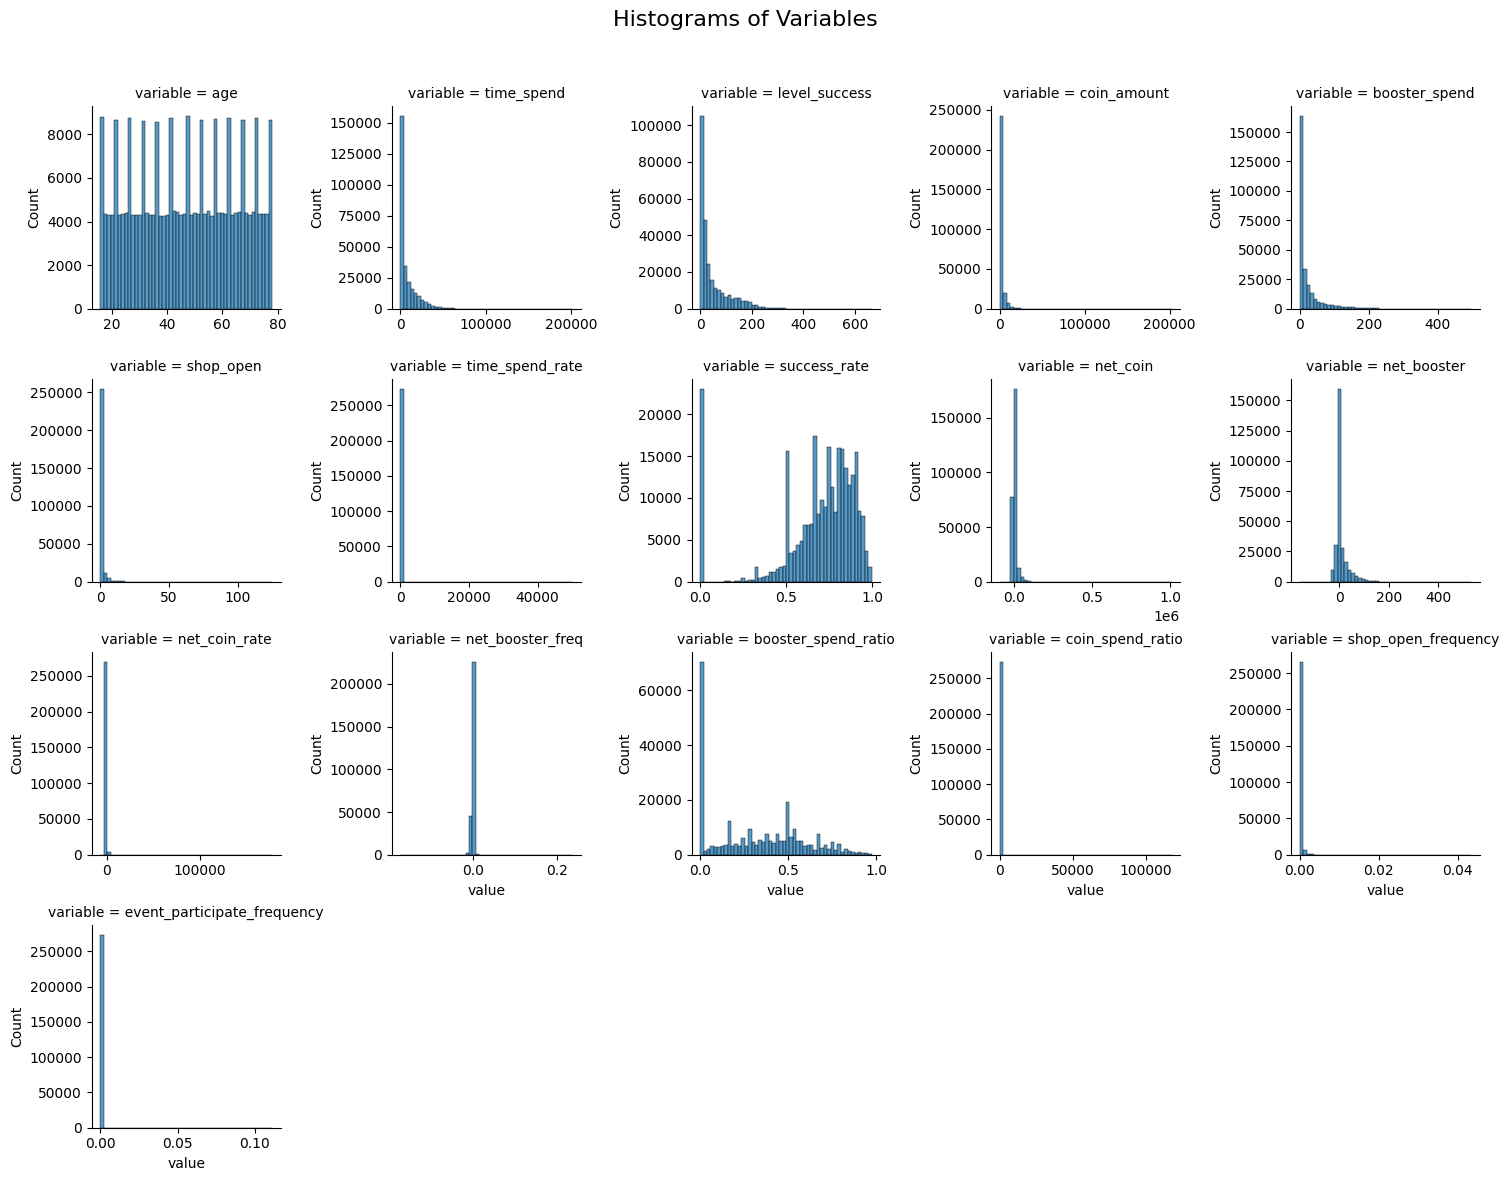

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from ml_utils import plot_histograms
#X_train.drop(columns=one_hot_encoded_columns).hist(figsize=(20,20), bins=50)
plot_histograms(X_train.drop(columns=one_hot_encoded_columns))

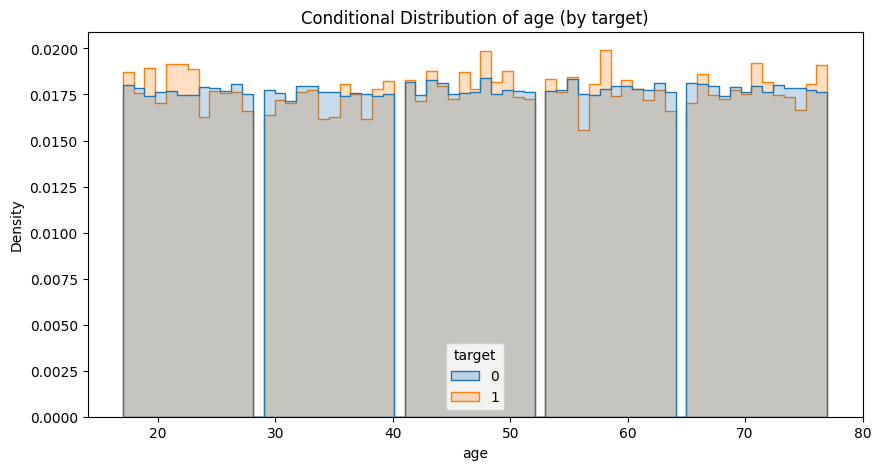

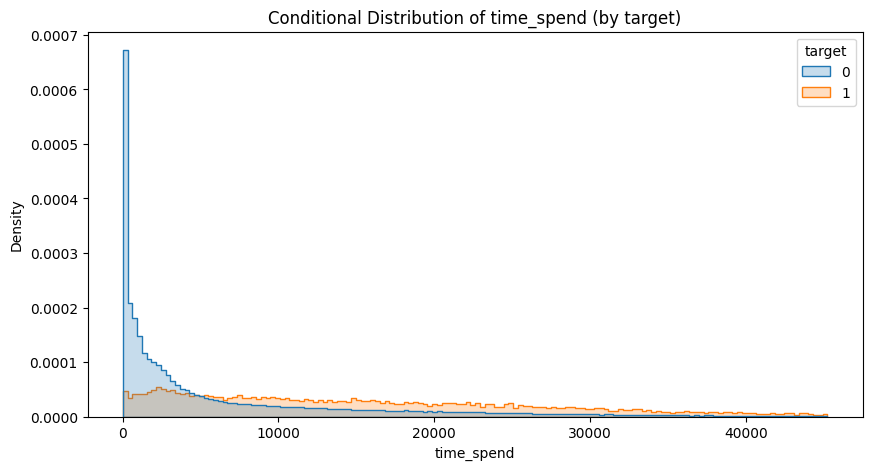

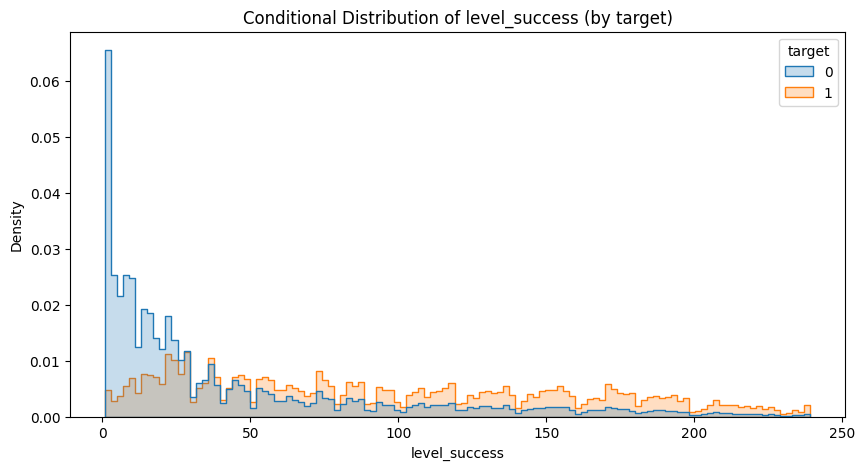

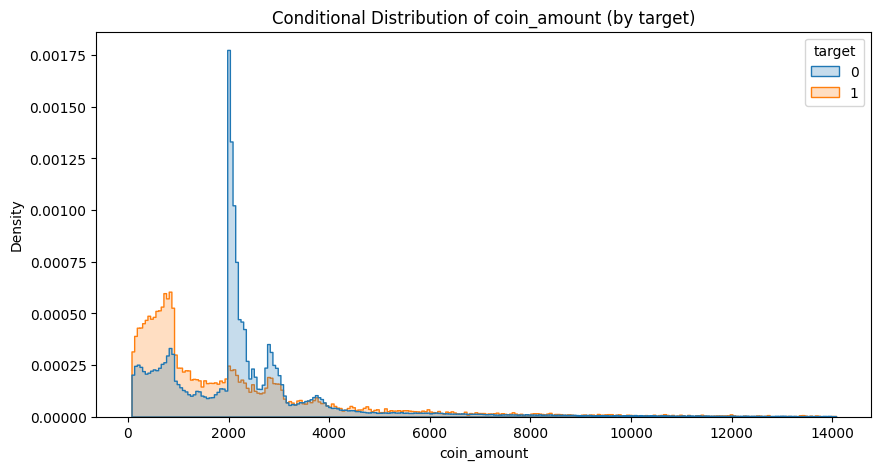

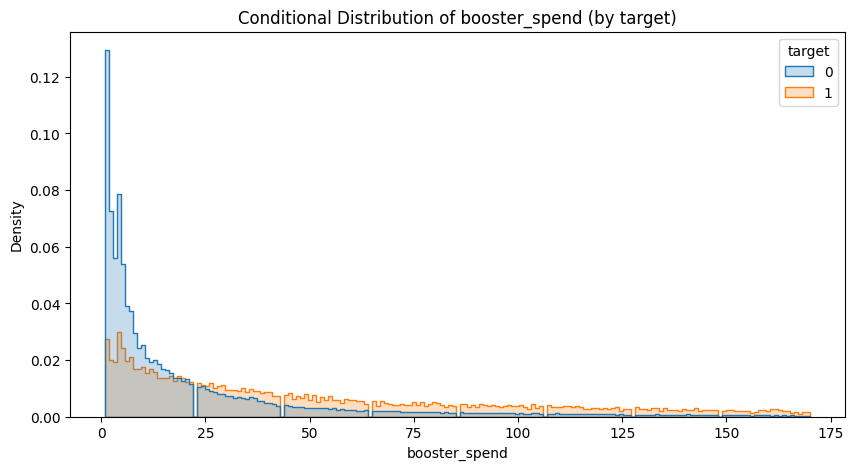

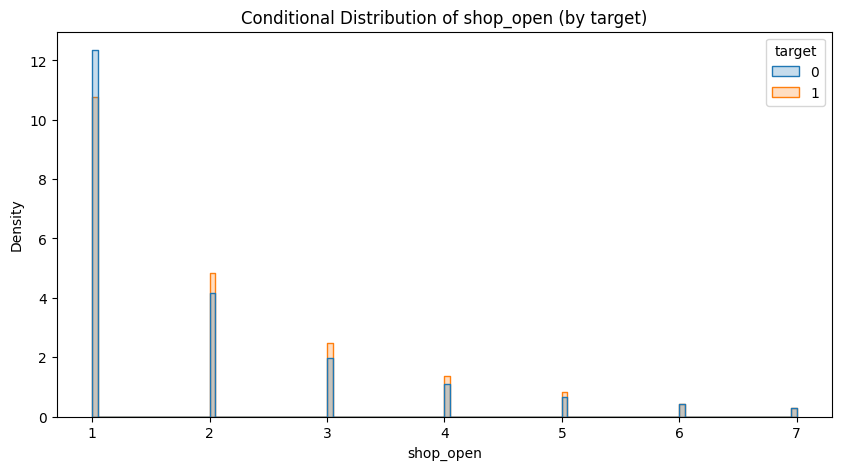

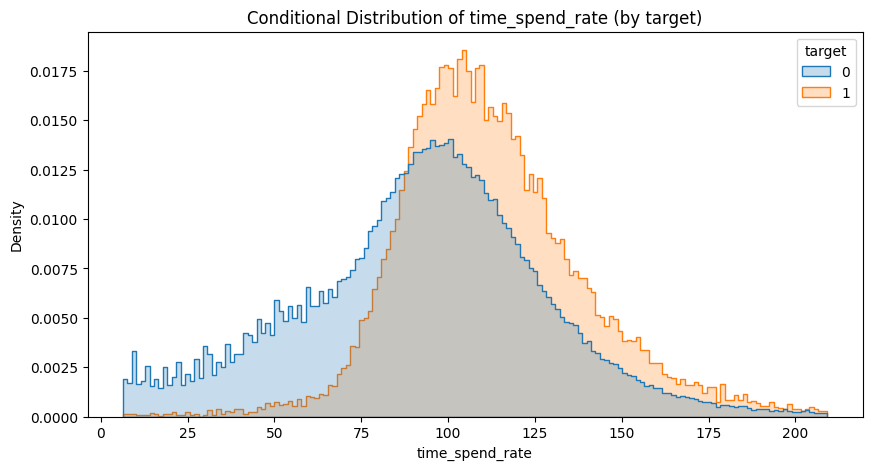

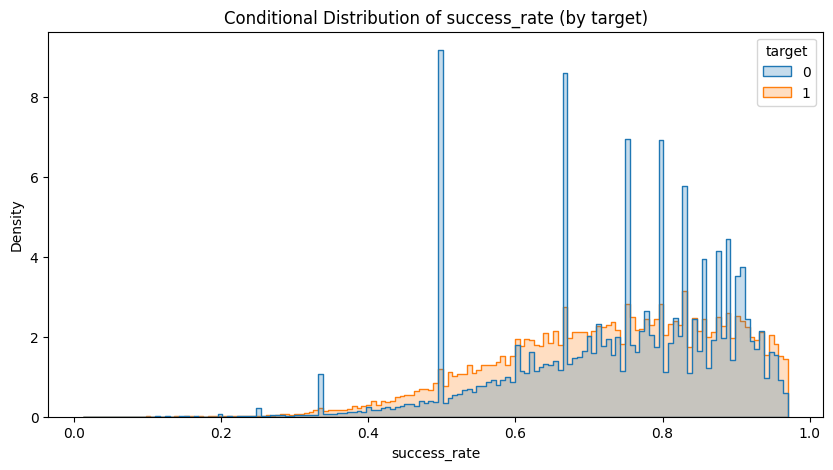

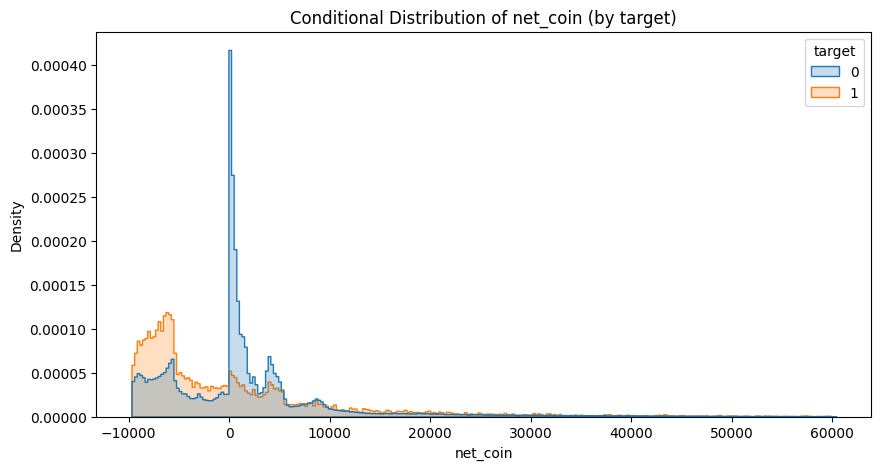

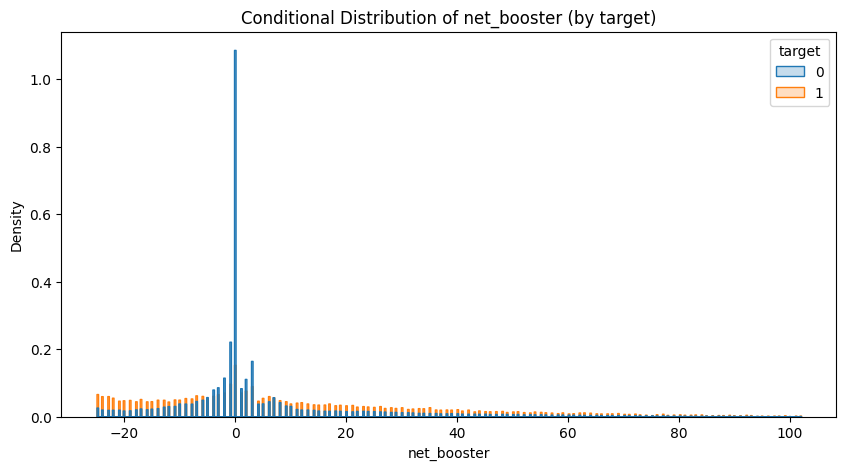

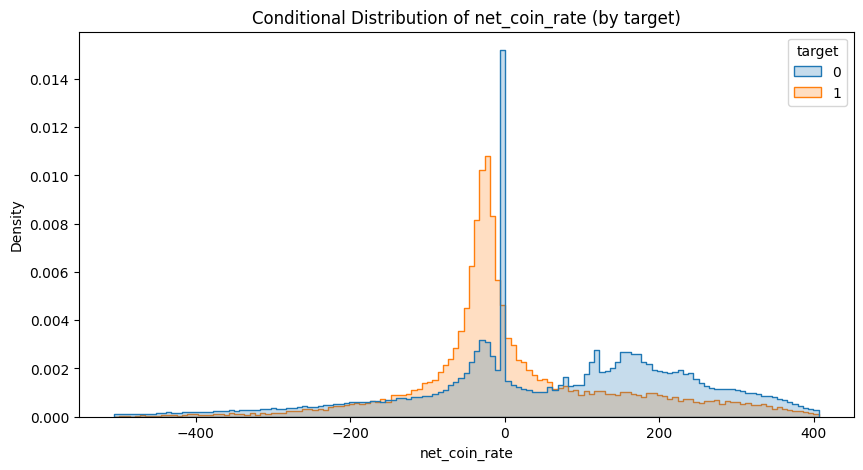

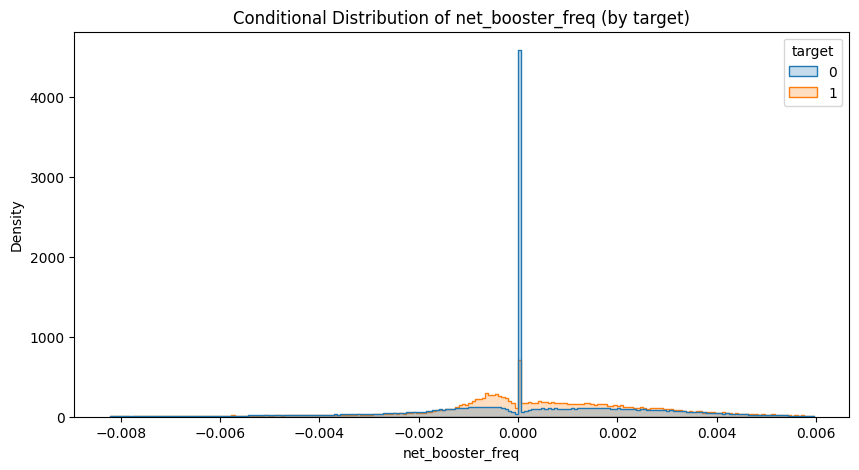

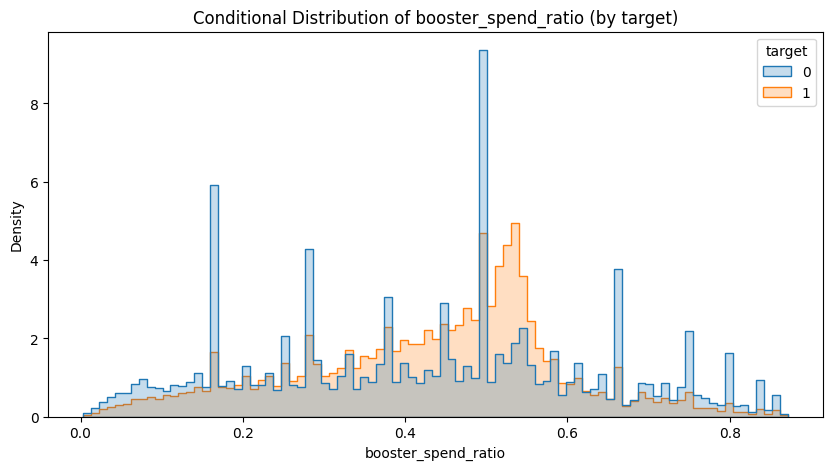

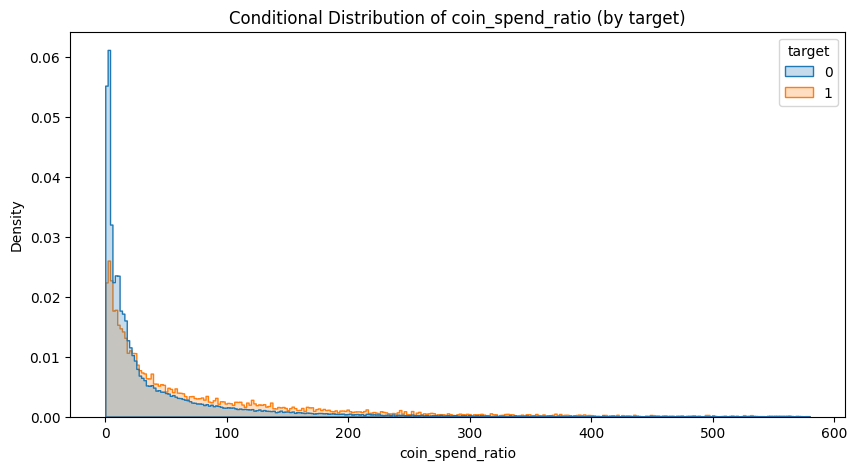

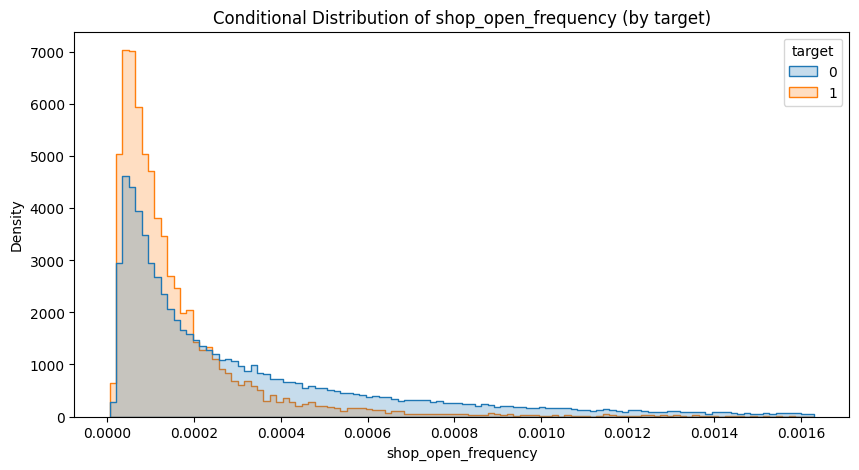

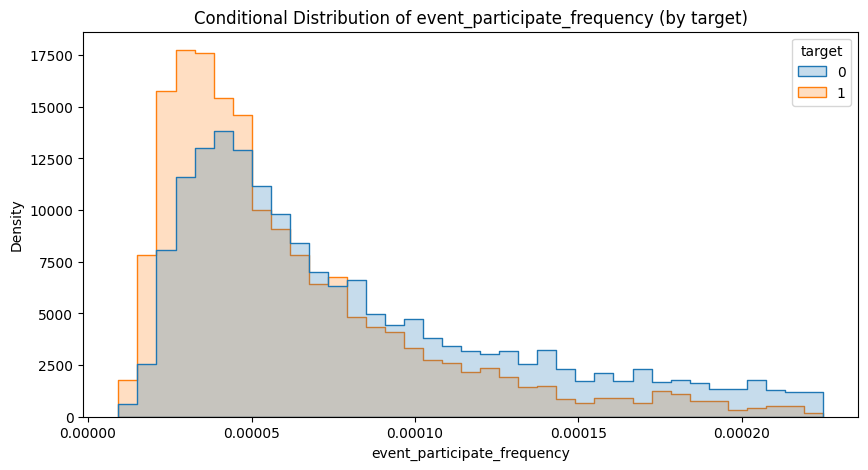

In [6]:
from ml_utils import plot_conditional_distributions
plot_conditional_distributions(X_train.drop(columns=one_hot_encoded_columns), y_train,min_quantile=0.01)

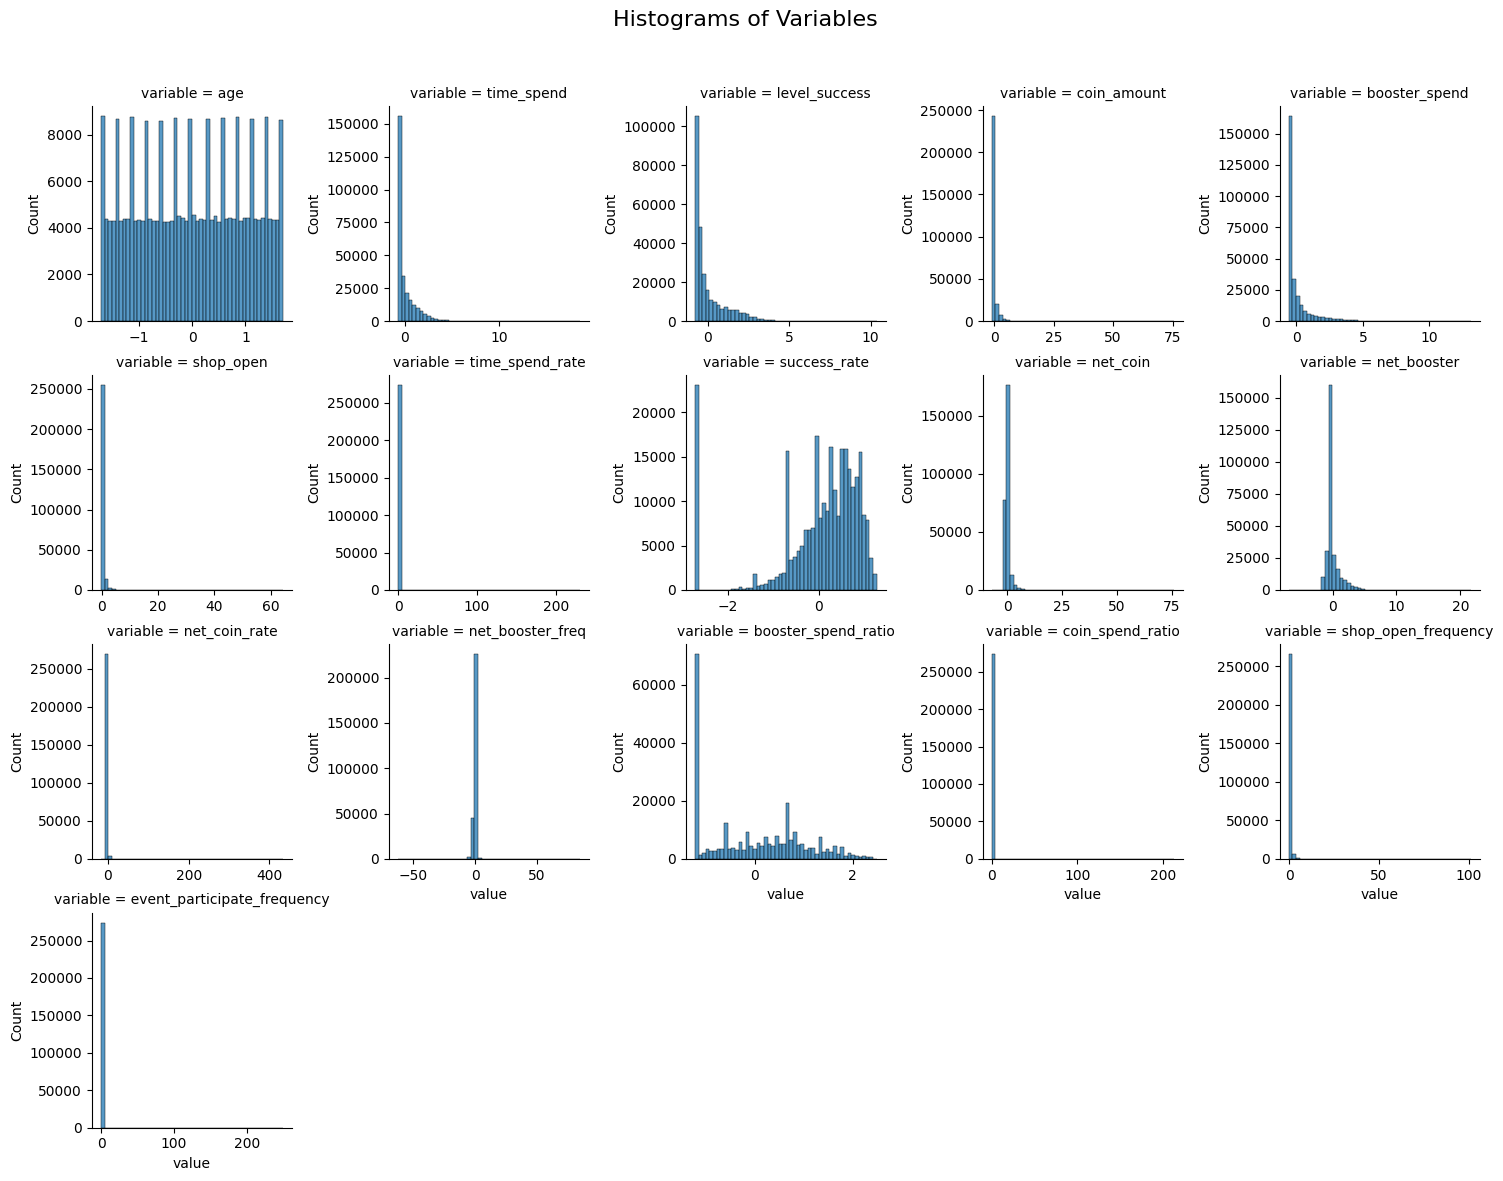

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=one_hot_encoded_columns))
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.drop(columns=one_hot_encoded_columns).columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test.drop(columns=one_hot_encoded_columns))
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.drop(columns=one_hot_encoded_columns).columns, index=X_test.index)

plot_histograms(X_train_scaled)


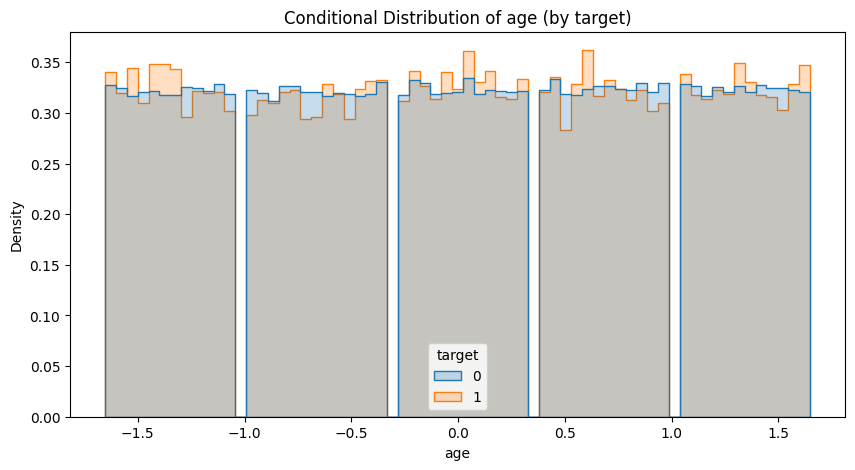

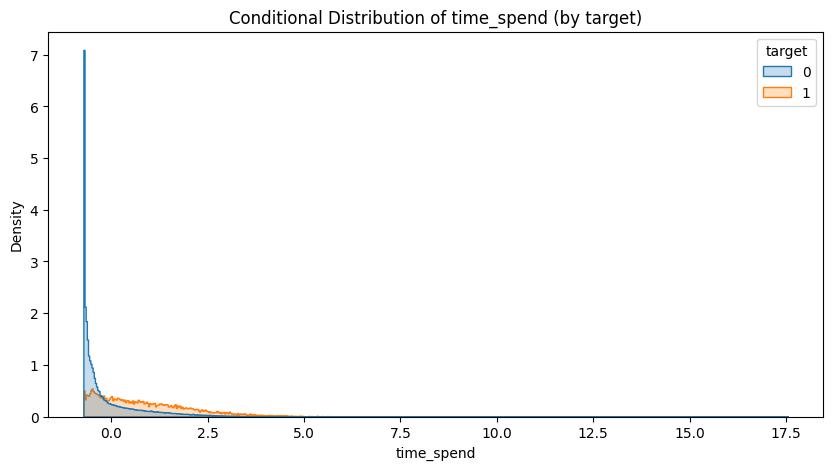

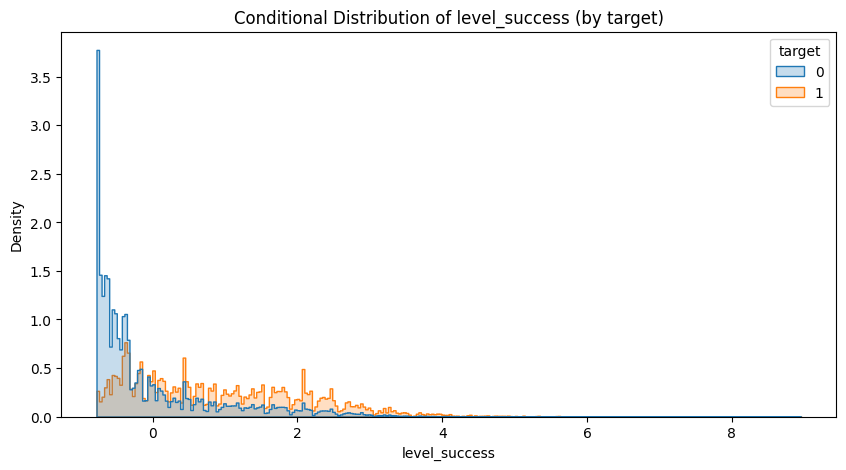

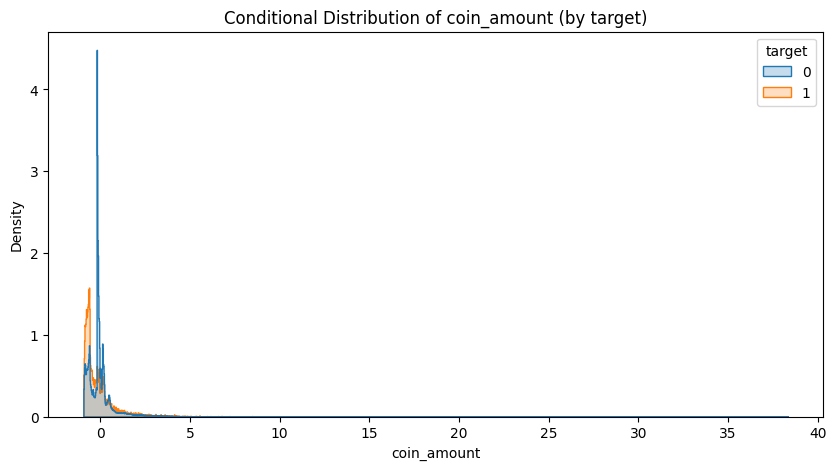

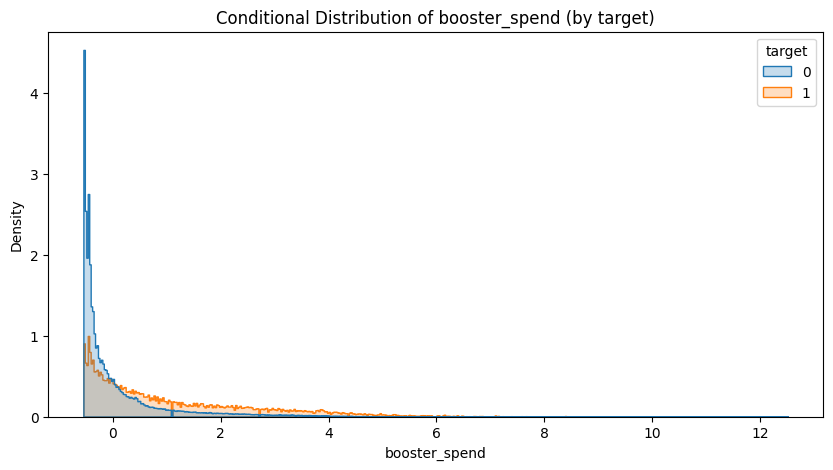

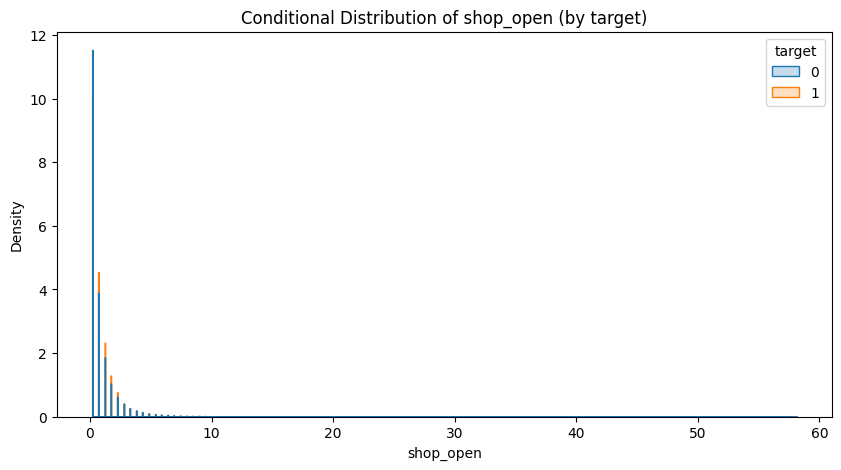

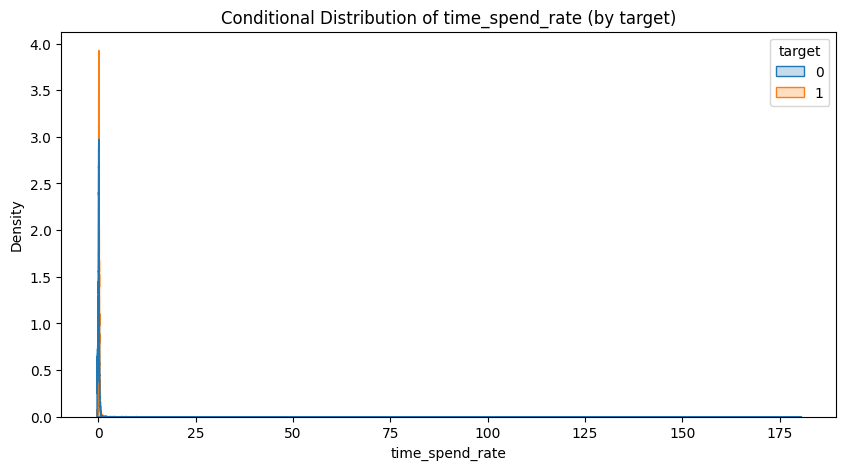

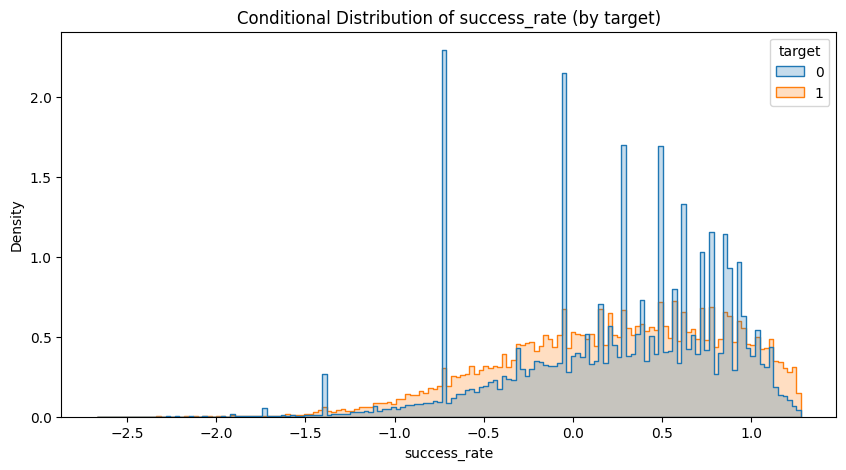

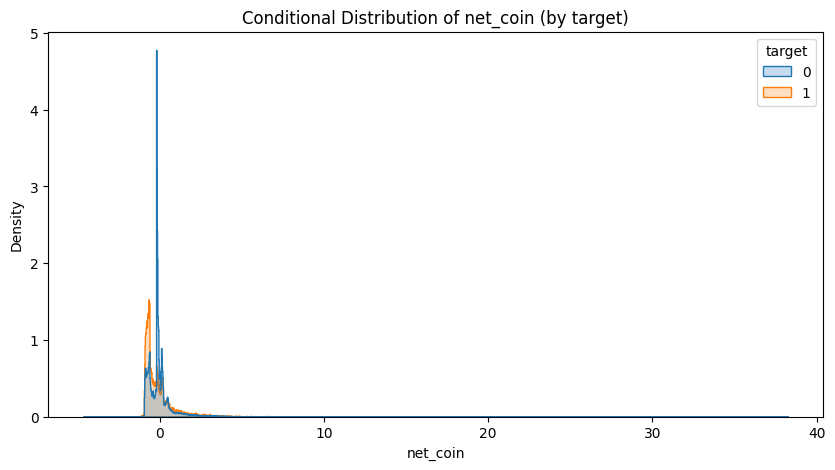

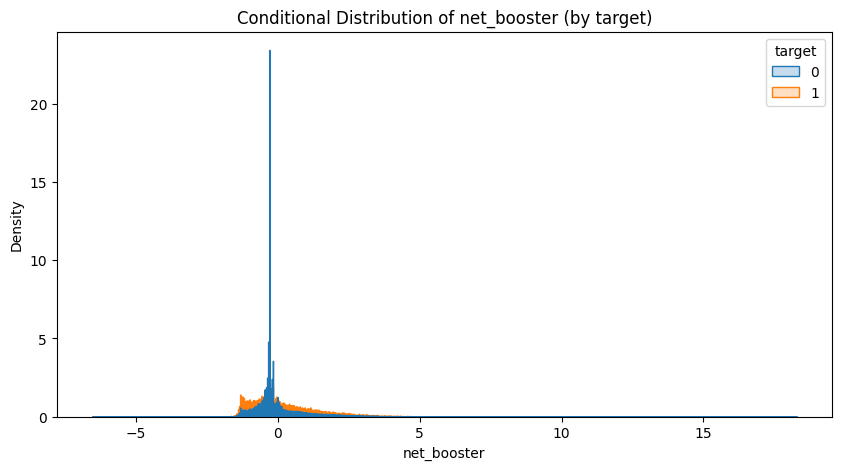

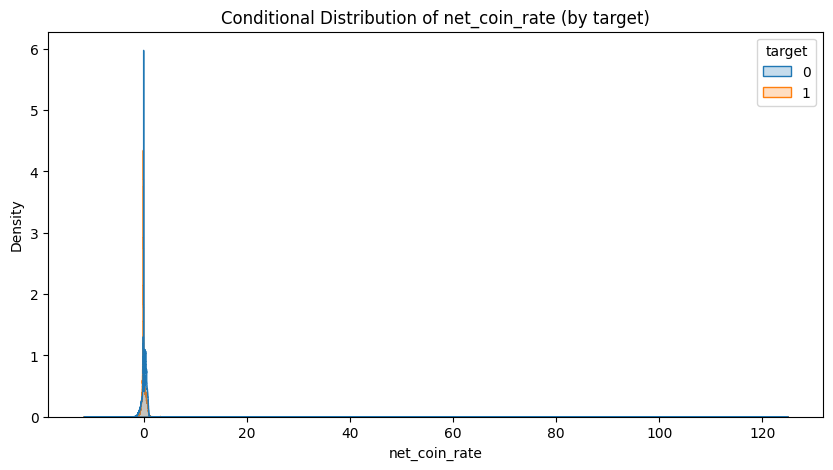

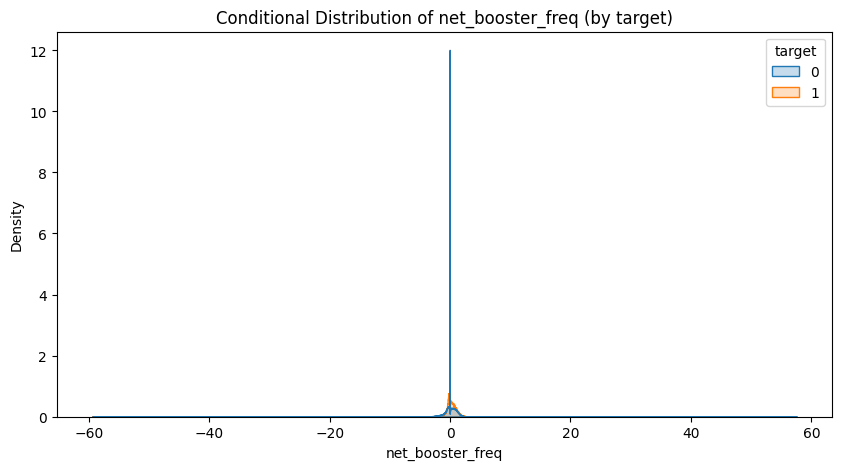

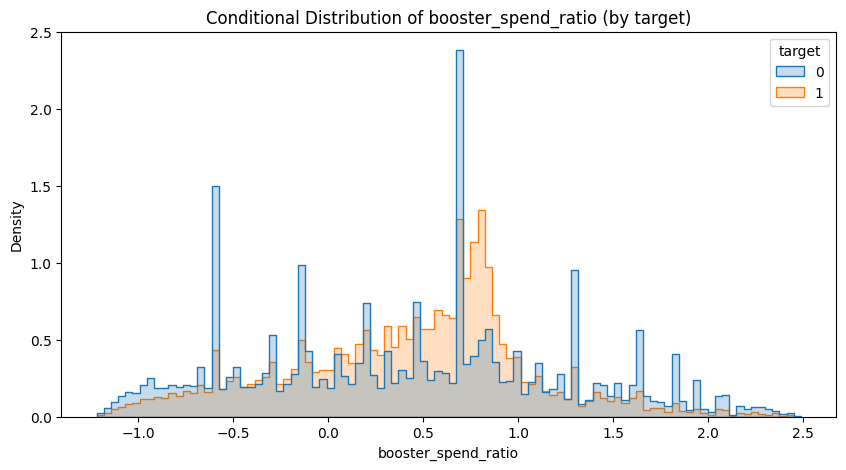

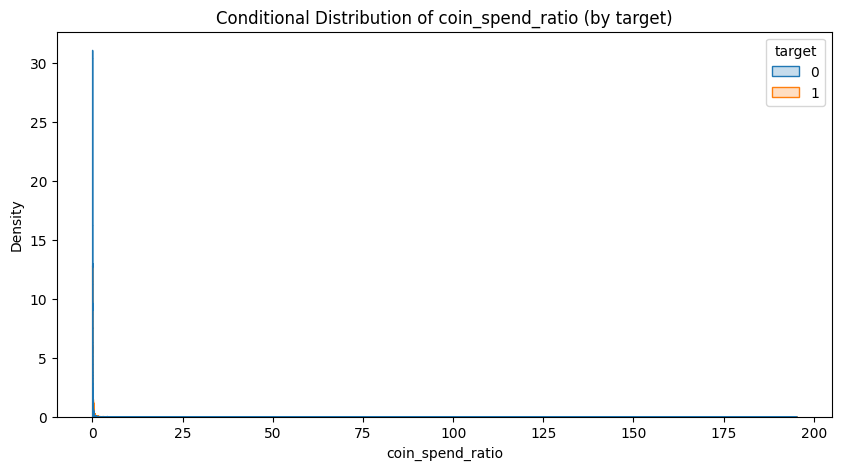

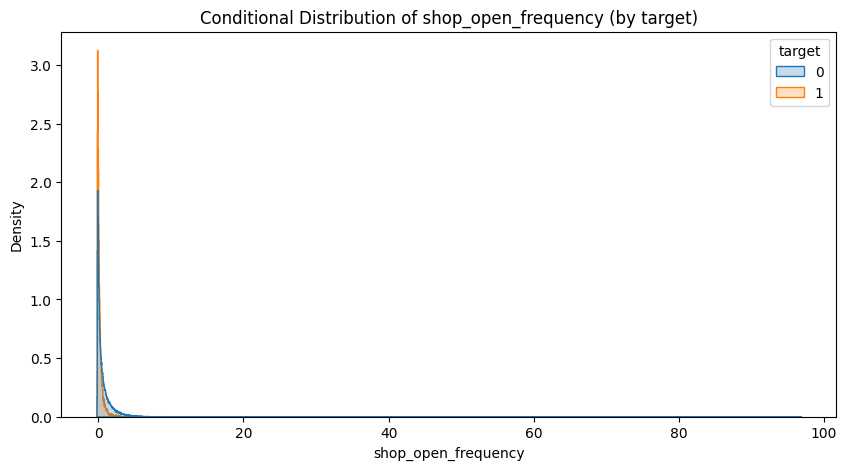

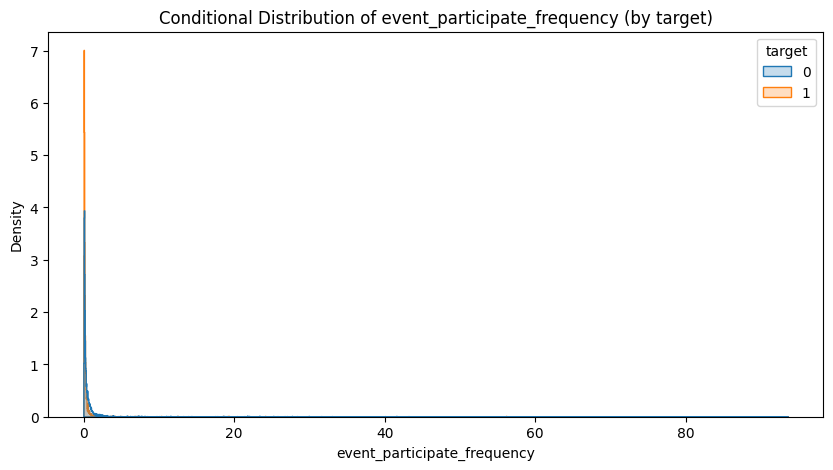

In [24]:
plot_conditional_distributions(X_train_scaled, y_train, min_quantile=0.0)

<Axes: xlabel='country'>

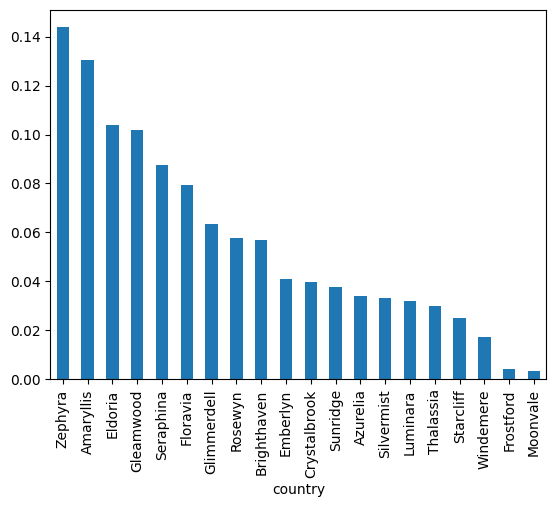

In [25]:
y_train.groupby(df['country'].loc[y_train.index]).mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='platform'>

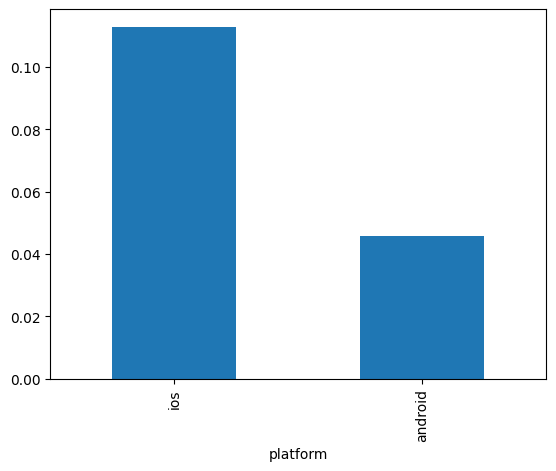

In [26]:
y_train.groupby(df['platform'].loc[y_train.index]).mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='network'>

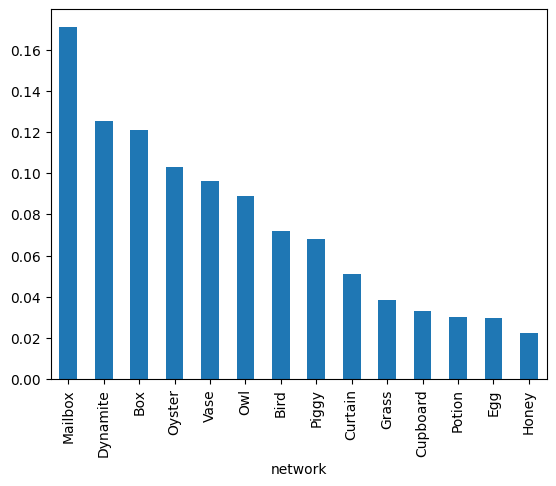

In [27]:
y_train.groupby(df['network'].loc[y_train.index]).mean().sort_values(ascending=False).plot(kind='bar')

In [29]:
X_train_scaled = pd.concat([X_train[one_hot_encoded_columns],X_train_scaled], axis=1)
X_test_scaled = pd.concat([X_test[one_hot_encoded_columns],X_test_scaled], axis=1)
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274015 entries, 83663 to 262437
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   event_participate            274015 non-null  Int64  
 1   country_Amaryllis            274015 non-null  bool   
 2   country_Azurelia             274015 non-null  bool   
 3   country_Brighthaven          274015 non-null  bool   
 4   country_Crystalbrook         274015 non-null  bool   
 5   country_Eldoria              274015 non-null  bool   
 6   country_Emberlyn             274015 non-null  bool   
 7   country_Floravia             274015 non-null  bool   
 8   country_Frostford            274015 non-null  bool   
 9   country_Gleamwood            274015 non-null  bool   
 10  country_Glimmerdell          274015 non-null  bool   
 11  country_Luminara             274015 non-null  bool   
 12  country_Moonvale             274015 non-null  bool   
 13  

### Logistic Regression

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score


#ratio_0_train = y_train.value_counts(normalize=True).loc[0]
#ratio_1_train = y_train.value_counts(normalize=True).loc[1]
ratio_0_train = 1
ratio_1_train = 1
sample_weight_train = y_train.replace({0: ratio_1_train, 1: ratio_0_train})

#ratio_0_test = y_test.value_counts(normalize=True).loc[0]
#ratio_1_test = y_test.value_counts(normalize=True).loc[1]

ratio_0_test = 1
ratio_1_test = 1
sample_weight_test = y_test.replace({0: ratio_1_test, 1: ratio_0_test})


model_lr = LogisticRegressionCV(
    cv=5,
    penalty='elasticnet',
    solver='saga',
    Cs = [0.001, 0.01, 0.1, 1, 10],
    l1_ratios=[0, 0.3, 0.5, 0.7, 1],    
    scoring='roc_auc',
    max_iter=5000,
    random_state=42,
    n_jobs=-1,
    verbose=1,
)

# Fit the model with the training data and sample weights
model_lr.fit(X_train_scaled, y_train, sample_weight=sample_weight_train)

# 5. Make predictions on the test set
# Note: predict_proba returns probabilities for both classes; we take the probability for class 1.
y_pred_prob_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = (y_pred_prob_lr >= 0.5).astype(int)

# 6. Evaluate the model
print("Classification Report (unweighted):")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score (unweighted):", roc_auc_score(y_test, y_pred_prob_lr))

print("Classification Report (weighted):")
print(classification_report(y_test, y_pred_lr, sample_weight=sample_weight_test))
print("ROC AUC Score (weighted):", roc_auc_score(y_test, y_pred_prob_lr, sample_weight=sample_weight_test))


ValueError: Input X contains NaN.
LogisticRegressionCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

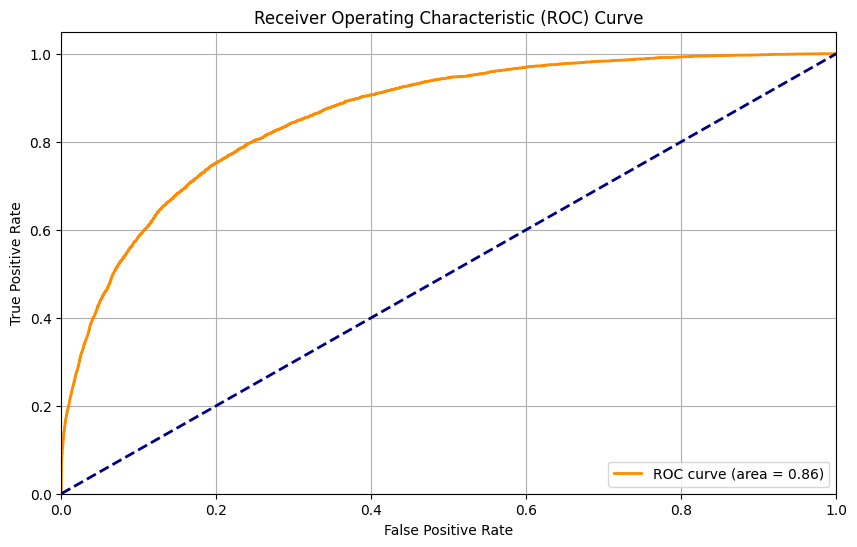

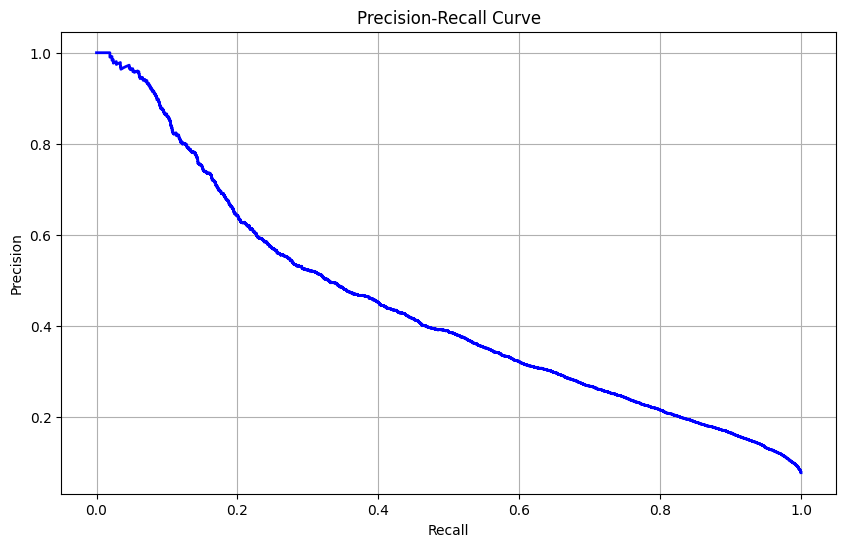

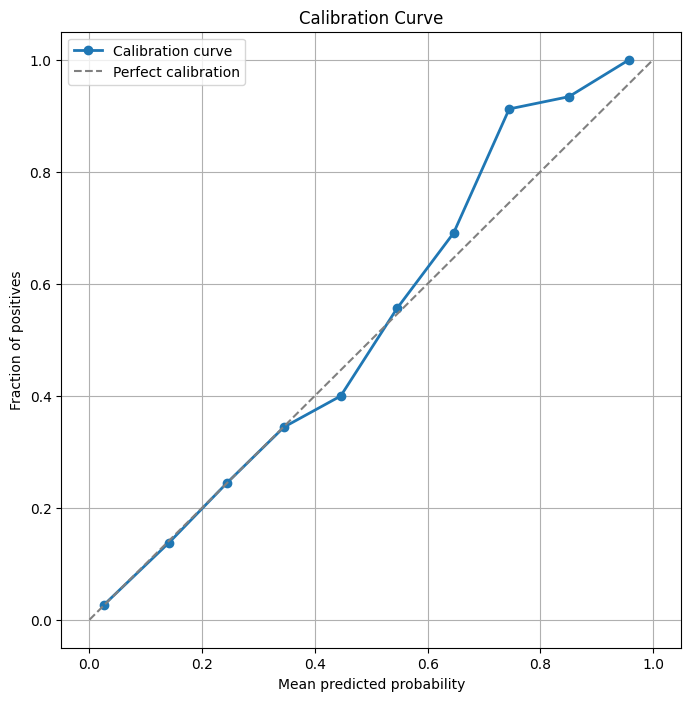

In [ ]:
from ml_utils import plot_roc_auc, plot_precision_recall, plot_calibration_curve
plot_roc_auc(y_test, y_pred_prob_lr)
plot_precision_recall(y_test, y_pred_prob_lr)
plot_calibration_curve(y_test, y_pred_prob_lr, n_bins=10)

In [15]:
for coeff, col in zip(model_lr.coef_[0], X_train_scaled.columns):
    print(f"{col}: {coeff}")

AttributeError: 'LogisticRegressionCV' object has no attribute 'coef_'

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define a parameter grid for tuning. You can adjust these values as needed.
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10, 20],
}

# Initialize the RandomForestClassifier with class_weight='balanced' to handle imbalance.
rf = RandomForestClassifier(
    class_weight=None,
    random_state=42,
    n_jobs=-1
)

# Set up GridSearchCV with 5-fold cross-validation and optimize for ROC AUC.
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on the training data.
grid_rf.fit(X_train_scaled, y_train)

# Best parameters and best CV score
print("Best Parameters:", grid_rf.best_params_)
print("Best CV ROC AUC Score:", grid_rf.best_score_)

# Predict on the test set
y_pred_rf = grid_rf.predict(X_test_scaled)
y_pred_prob_rf = grid_rf.predict_proba(X_test_scaled)[:, 1]




Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=20; total time=  12.7s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=20; total time=  13.7s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=20; total time=  14.4s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=20; total time=  14.0s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=20; total time=  17.2s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time=  21.9s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time=  21.6s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time=  22.4s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time=  24.7s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time=  25.9s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=20; total time=  13.5s
[CV] END .max_depth=5, min_samples_split=10, n_

/home/yusuf/myenv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 1.7min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 1.7min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=20, min_samples_split=10, n_estimators=20; total time=  22.6s
[CV] END max_depth=20, min_samples_split=10, n_estimators=20; total time=  28.9s
[CV] END max_depth=20, min_samples_split=10, n_estimators=20; total time=  32.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 1.6min
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=  49.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=  57.5s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=  55.4s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=  57.7s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time= 1.0min
[CV] END max_depth=20, min_s

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

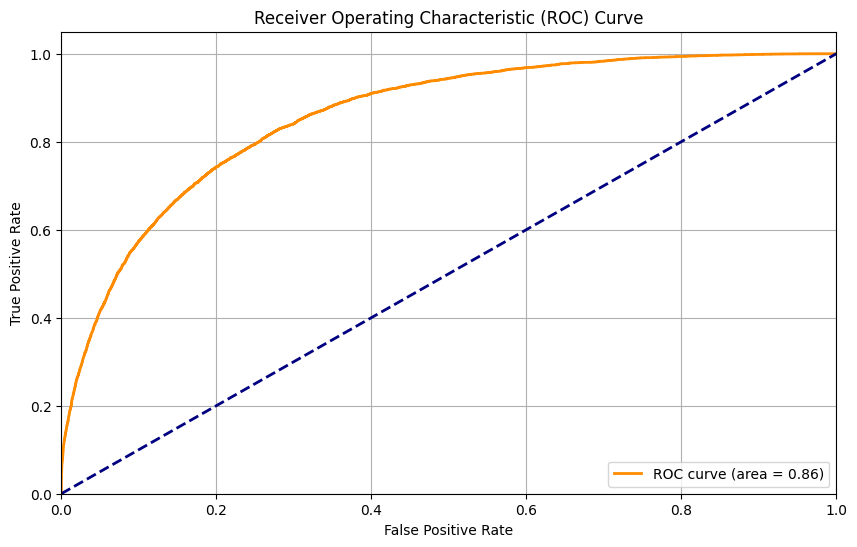

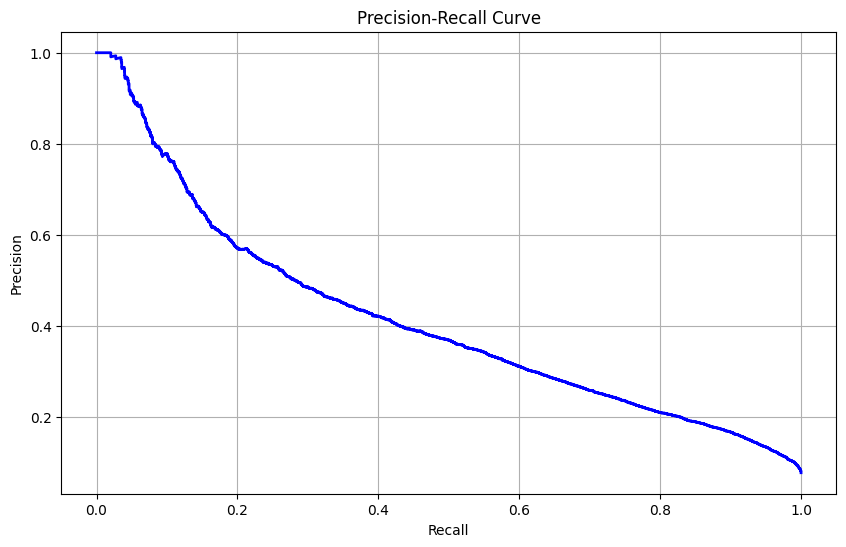

In [ ]:
plot_roc_auc(y_test, y_pred_prob_rf)
plot_precision_recall(y_test, y_pred_prob_rf)
plot_calibration_curve(y_test, y_pred_prob_rf, n_bins=10)

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# and eval_metric is set to 'auc' for consistency with our scoring.
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    #use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Set up GridSearchCV to perform a detailed hyperparameter search with 5-fold cross-validation.
grid_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on the training data.
grid_xgb.fit(X_train_scaled, y_train)

# Display the best hyperparameters and best cross-validation ROC AUC score.
print("Best Parameters:", grid_xgb.best_params_)
print("Best CV ROC AUC Score:", grid_xgb.best_score_)

# Make predictions on the test set.
y_pred_xgb = grid_xgb.predict(X_test_scaled)
y_pred_prob_xgb = grid_xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model performance.
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))


scale_pos_weight: 11.763286599282686
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=0.5; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=0.5; 

/home/yusuf/myenv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=0.5; total time=   6.4s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=50, scale_pos_weight=11.763286599282686, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=100, scale_pos_weight=11.763286599282686, subsample=0.5; total time=   7.9s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=100, scale_pos_weight=11.763286599282686, subsample=0.5; total time=   8.4s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=100, scale_pos_weight=11.763286599282686, subsample=0.5; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=100, scale_pos_weight=11.763286599282686, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=4, n_estimators=

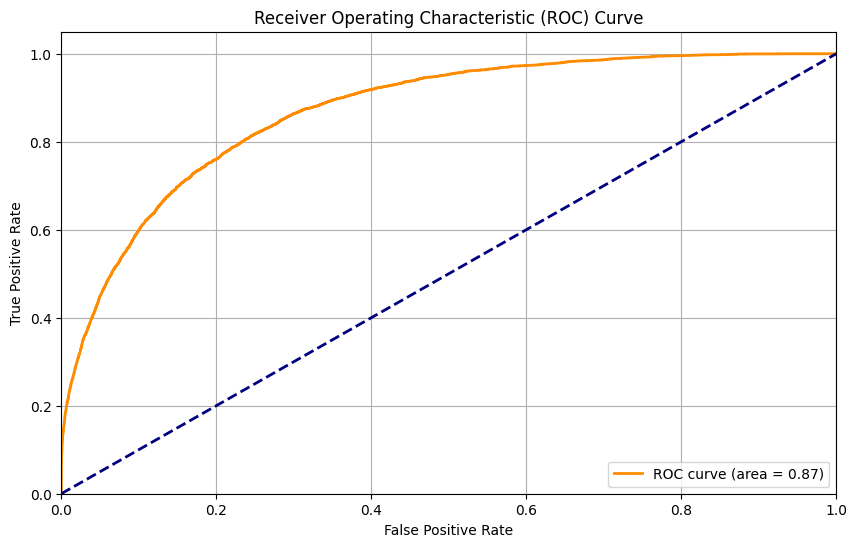

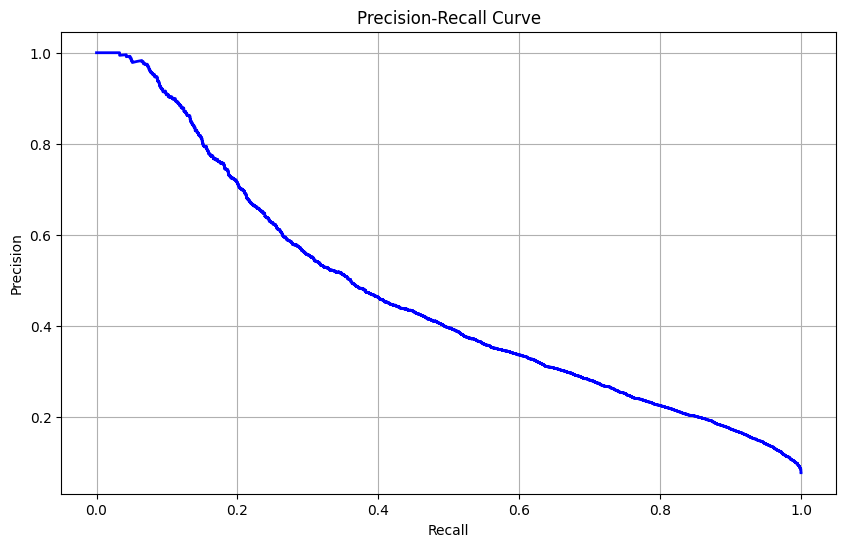

In [ ]:
plot_roc_auc(y_test, y_pred_prob_xgb)
plot_precision_recall(y_test, y_pred_prob_xgb)
plot_calibration_curve(y_test, y_pred_prob_xgb, n_bins=10)

/home/yusuf/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_39598/323469034.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


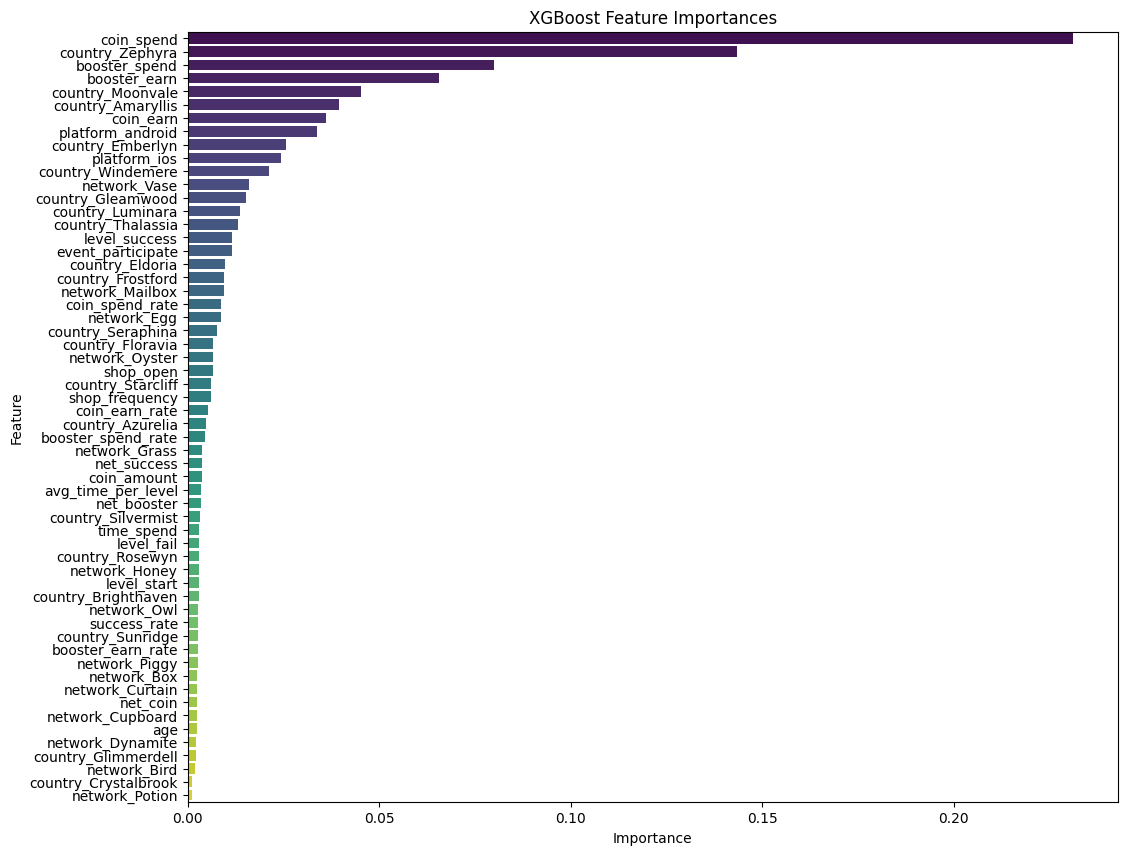

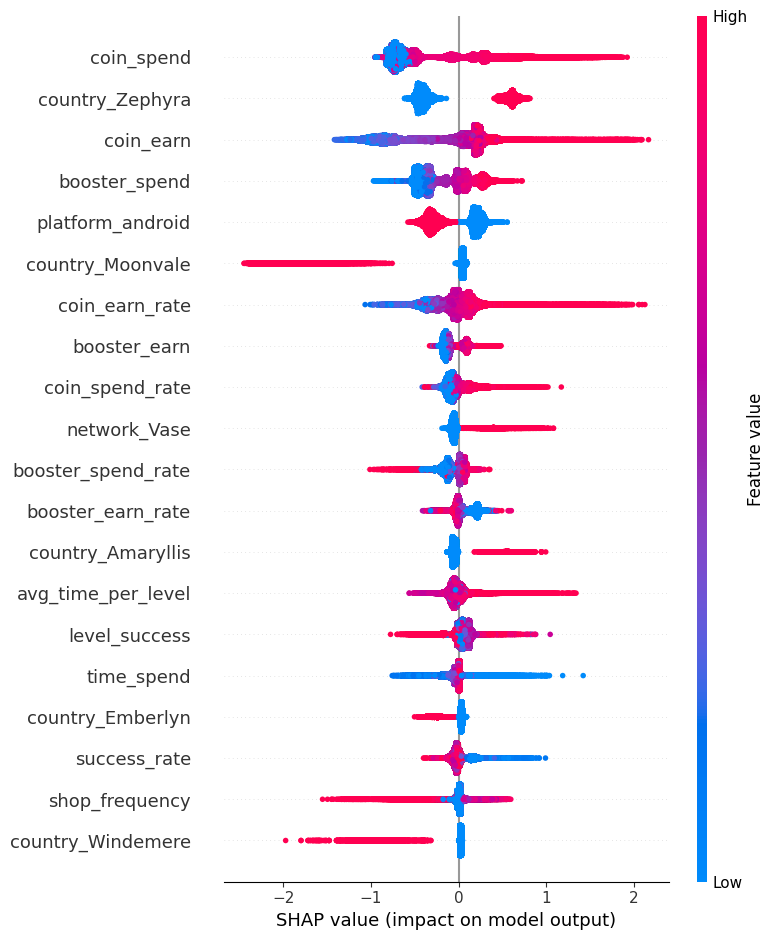

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Retrieve the best estimator from the grid search.
best_xgb = grid_xgb.best_estimator_

# --------------------------
# 1. Plotting XGBoost Feature Importances
# --------------------------
# Get feature importances from the best model.
importances = best_xgb.feature_importances_
features = X_train_scaled.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances as a horizontal bar plot.
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the training set.
# Note: For classification, shap_values will be a list (one per class)
shap_values = explainer.shap_values(X_train_scaled)

# For binary classification, we can use the SHAP values for class 1.
# If shap_values is a list, then shap_values[1] corresponds to the positive class.
if isinstance(shap_values, list):
    shap_vals = shap_values[1]
else:
    shap_vals = shap_values

# Plot the summary plot to show the impact of features on the model output.
shap.summary_plot(shap_vals, X_train_scaled, feature_names=X_train_scaled.columns)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Define the input dimension based on your preprocessed training data.
input_dim = X_train_scaled.shape[1]

# Build the neural network architecture.
model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  
])


# Convert sample weights to float (e.g., float32)
sample_weight_train = sample_weight_train.astype(np.float32).to_numpy()
sample_weight_test = sample_weight_test.astype(np.float32).to_numpy()

# Convert target variables to numpy arrays with a proper dtype (e.g., float32)
y_train_array = y_train.to_numpy().astype(np.float32)
y_test_array = y_test.to_numpy().astype(np.float32)

X_train_array = X_train_scaled.to_numpy().astype(np.float32)
X_test_array = X_test_scaled.to_numpy().astype(np.float32)

# Compile the model using binary cross-entropy loss and metrics including AUC.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Use early stopping to prevent overfitting.
early_stop = EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)

# Train the model. We use a validation split (e.g., 20% of the training data) and pass sample weights.
history = model.fit(
    X_train_array, y_train_array,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    sample_weight=sample_weight_train,
    verbose=1
)

# Evaluate the model on the test set, using the test sample weights.
test_results = model.evaluate(X_test_array, y_test_array, sample_weight=sample_weight_test, verbose=0)
print("Test Loss: {:.4f}, Test Accuracy: {:.4f}, Test AUC: {:.4f}".format(test_results[0], test_results[1], test_results[2]))

# Make predictions on the test set.
y_pred_prob_nn = model.predict(X_test_array)
y_pred_nn = (y_pred_prob_nn >= 0.5).astype(int)

# Display a classification report.
print("Classification Report:")
print(classification_report(y_test_array, y_pred_nn))


2025-02-21 00:02:54.609956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 00:02:54.612598: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 00:02:54.617934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740085374.626056   39598 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740085374.628305   39598 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-21 00:02:54.637755: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6337 - auc: 0.7622 - loss: 0.0866 - val_accuracy: 0.7261 - val_auc: 0.8686 - val_loss: 0.0650
Epoch 2/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7356 - auc: 0.8503 - loss: 0.0695 - val_accuracy: 0.7473 - val_auc: 0.8714 - val_loss: 0.0641
Epoch 3/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7431 - auc: 0.8558 - loss: 0.0686 - val_accuracy: 0.7348 - val_auc: 0.8718 - val_loss: 0.0641
Epoch 4/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7496 - auc: 0.8588 - loss: 0.0678 - val_accuracy: 0.7503 - val_auc: 0.8721 - val_loss: 0.0638
Epoch 5/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - auc: 0.8604 - loss: 0.0676 - val_accuracy: 0.7679 - val_auc: 0.8726 - val_loss: 0.0639
Epoch 6/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7462 - auc: 0.8594 - loss: 0.0673 - val_accuracy: 0.7555 - val_auc: 0.8726 - val_loss: 0.0637
Epoch 7/100
857/857 ━━━━━━━━━━━━━━

In [ ]:
print("Classification Report:")
print(classification_report(y_test_array, y_pred_nn))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     63137
         1.0       0.21      0.82      0.34      5367

    accuracy                           0.75     68504
   macro avg       0.60      0.78      0.59     68504
weighted avg       0.92      0.75      0.81     68504



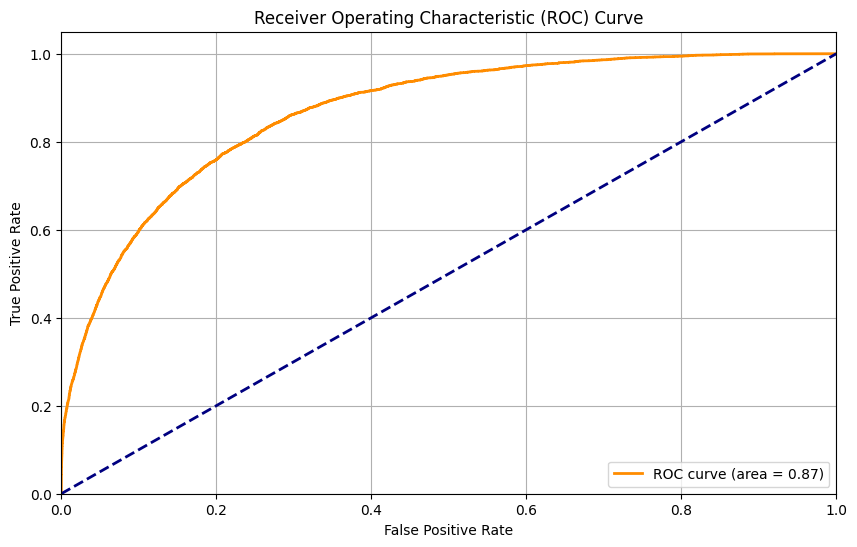

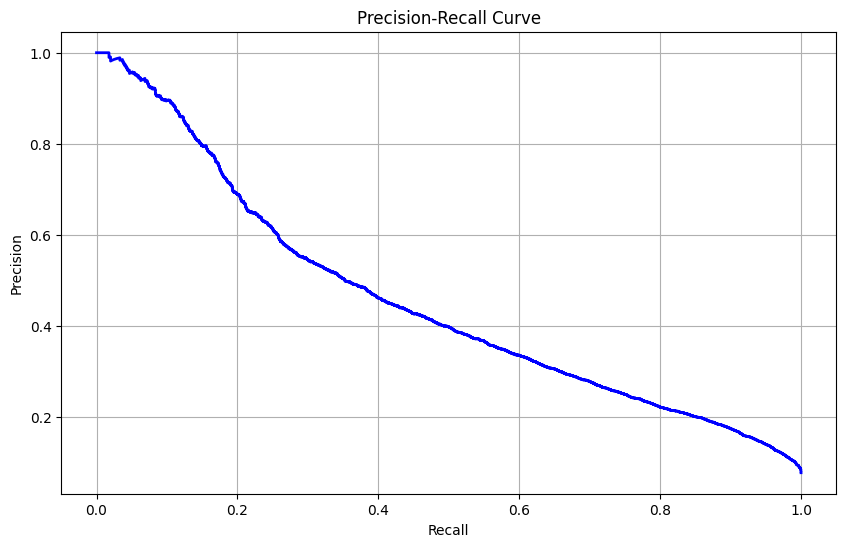

In [ ]:
plot_roc_auc(y_test_array, y_pred_prob_nn)
plot_precision_recall(y_test_array, y_pred_prob_nn)
plot_calibration_curve(y_test_array, y_pred_prob_nn, n_bins=10)